 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
import pandas as pd
import sys
sys.path.append('..')
from lib import Node
from lib import Tree

In [2]:
df = pd.read_pickle('../data/parsed/pickled_data_test.pickle')

In [3]:
### Ju Yun's test suite 11-11

test = df.loc[df['Scenario'] == '401']
test_labeled = test.loc[test['Label'] != '-1']
test = test_labeled[0:100]
#test = test.sample(frac=1)
test = test.reset_index(drop=True)

# print(test.loc[test['From'].apply(lambda x: x[0]) == 'david.forster@enron.com'].index.values)
# print(test.loc[test['From'])
ls = ['From','To']
#data, depth, benchmark, rows, features, cat_features)
tree = Tree(test, 100, None, range(test.shape[0]), ls, ls)
tree.fit()
print(tree)





split_cat: current feature: From
split_cat: splitting on address: david.forster@enron.com
split_cat: num left: 3
split_cat: num right: 97


best_breakpoint_this_feature: david.forster@enron.com


split_cat: current feature: To
split_cat: splitting on address: cameron@perfect.com
split_cat: num left: 3
split_cat: num right: 97


feature we used: From
I'm left!
The node is pure, no more splitting
I'm right!


split_cat: current feature: From
split_cat: splitting on address: chris.dorland@enron.com
split_cat: num left: 7
split_cat: num right: 90


best_breakpoint_this_feature: chris.dorland@enron.com


split_cat: current feature: To
split_cat: splitting on address: cameron@perfect.com
split_cat: num left: 3
split_cat: num right: 94


feature we used: From
I'm left!


split_cat: current feature: To
split_cat: splitting on address: bgabrielson@cdnam.com
split_cat: num left: 1
split_cat: num right: 6


best_breakpoint_this_feature: bgabrielson@cdnam.com
feature we used: To
I'm left!
The no

In [7]:
rows = [34, 39, 56]
feature = 'To'
test.loc[rows][feature]

34    [cameron@perfect.com]
39    [cameron@perfect.com]
56    [cameron@perfect.com]
Name: To, dtype: object

In [7]:
test.loc[test['From'].apply(lambda x: 'david.forster@enron.com' in x)].index.values

array([84, 89, 98])

In [13]:
test.loc[test['From'].apply(lambda x: 'david.forster@enron.com' not in x)].index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85,
       86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 99])

In [ ]:
rows = [1, 30, 32, 43, 46]

In [ ]:
members = df.loc[rows]['Label'].values

In [ ]:
members

In [ ]:
members == '-1'

In [ ]:
a = members[members == '-1']
a

TODO:

- Dates to some kind of number
- ~~from, to: split using membership~~
- dates: split on number
- subject: find subjects that are equal, or lsa matrix


In [ ]:
one = df.loc[df['Scenario'] == '401']
one_labeled = one.loc[one['Label'] != '-1']
one_labeled.shape

In [ ]:
def get_first(l):
    return l[0]

In [ ]:
df['From'].apply(lambda x: x[0]).unique()[0]

In [ ]:
##test.loc[test['From'].apply(lambda x: x[0]) == 'david.forster@enron.com'].index.valuestest[0:1]

In [ ]:
test = df.loc[df['Scenario'] == '401']
test_labeled = test.loc[test['Label'] != '-1']
test = test_labeled[0:100]

In [ ]:
test.shape

In [ ]:
# test = test.sample(frac=1)
test = test.reset_index(drop=True)

In [ ]:
ls = ['From']

In [ ]:
rows = [80, 81, 82, 85, 86, 87, 88]
address = 'registrar.isc@enron.com'
feature = 'From'
# uniques = test[feature].apply(lambda x: x[0]).unique()
# to_parse = [(test['From'][x],test['Label'][x]) for x in rows]
# to_parse = pd.DataFrame(to_parse, columns=('From','Label'), index=rows)
uniques = test.loc[rows]['From'].apply(lambda x: x[0]).unique()
# to_parse.loc[to_parse['From'].apply(lambda x: x[0]) == address].index.values
uniques

In [ ]:
#data, depth, benchmark, rows, features, cat_features)
tree = Tree(test, 4, None, range(test.shape[0]), ls, ls)

In [ ]:
tree.fit()
print(tree)

In [4]:
tree.visualize()

'digraph Tree {\nnode [shape=box];\n4664248326 [label="X[From] < david.forster@enron.com\ngini = 0.23958762886597942\nsamples = 100\ndistribution = [3, 97]"];\n3467140467 [label="samples = 3\nratio = [0.0, 1.0]"];\n4664248326 -> 3467140467 [labeldistance=8, labelangle=30, xlabel="True"]\n2127453501 [label="X[From] < chris.dorland@enron.com\ngini = 0.2186221567664867\nsamples = 97\ndistribution = [7, 90]"];\n4664248326 -> 2127453501 [labeldistance=8, labelangle=-30, xlabel="False"]\n6585858081 [label="X[To] < bgabrielson@cdnam.com\ngini = 0.38095238095238093\nsamples = 7\ndistribution = [1, 6]"];\n2127453501 -> 6585858081 [labeldistance=8, labelangle=30, xlabel="True"]\n3238244945 [label="X[From] < ann.schmidt@enron.com\ngini = 0.17624521072796934\nsamples = 90\ndistribution = [3, 87]"];\n2127453501 -> 3238244945 [labeldistance=8, labelangle=-30, xlabel="False"]\n5909407123 [label="samples = 1\nratio = [1.0, 0.0]"];\n6585858081 -> 5909407123 [labeldistance=8, labelangle=30, xlabel="True

In [5]:
%%bash
cd vis
dot -Tpng tree.dot -o tree.png
dot -Tsvg tree.dot -o tree.svg

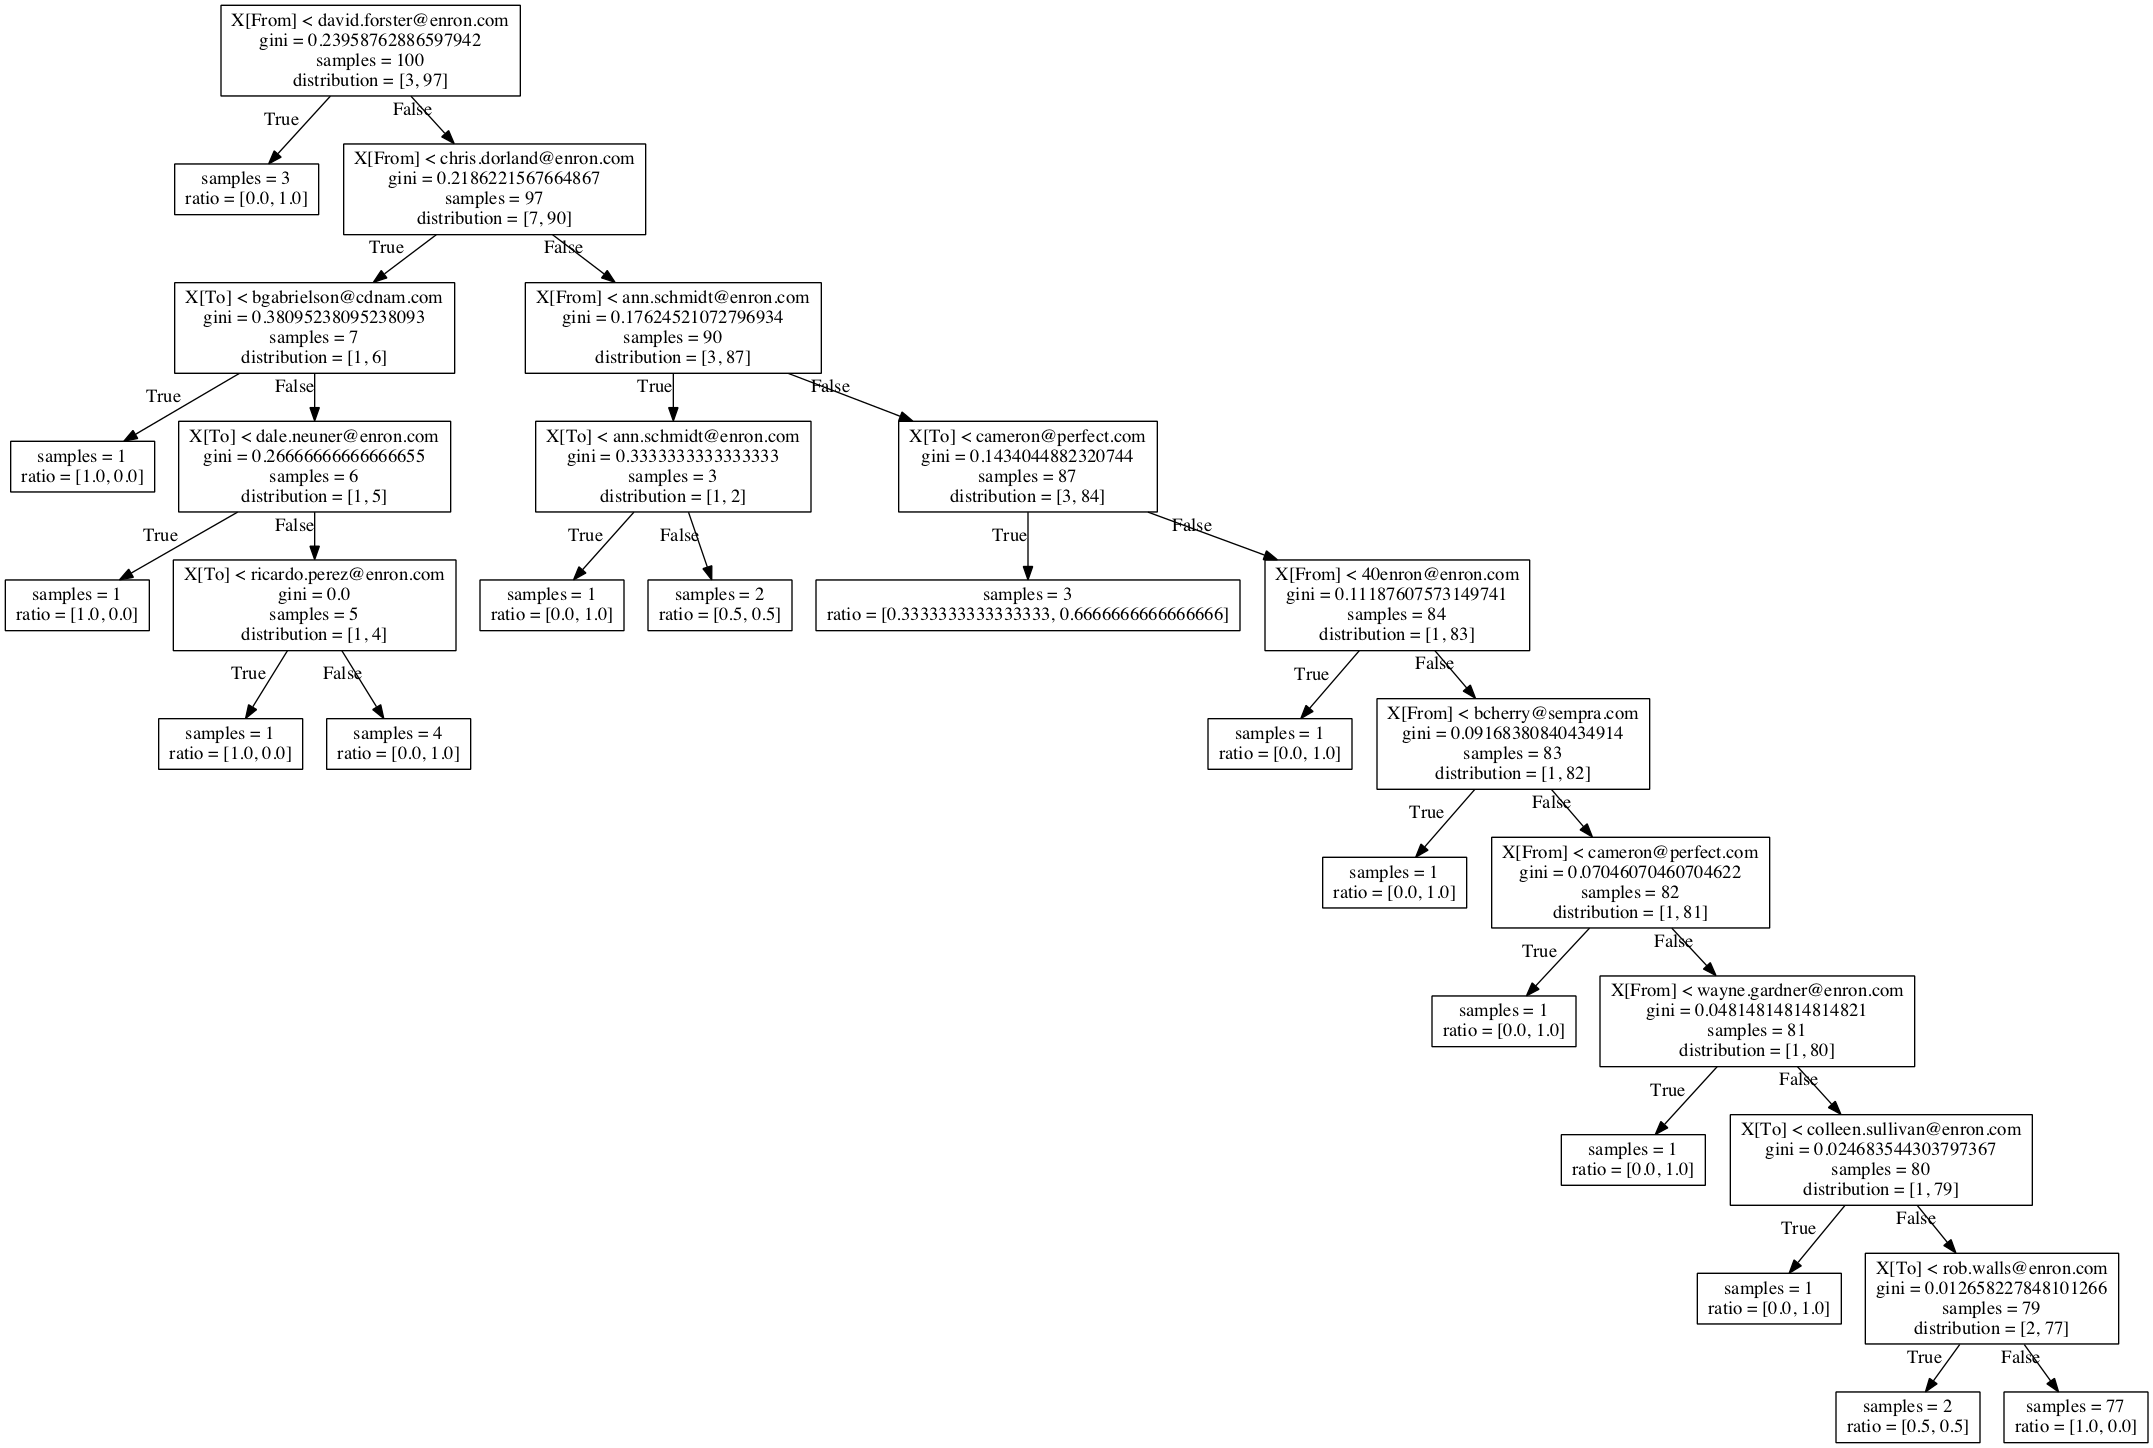

In [6]:
from IPython.display import Image
Image(filename='vis/tree.png')

In [ ]:
test.loc[test['From'].apply(lambda x: x[0]) == 'david.forster@enron.com'].index.values

In [ ]:
members = test.loc[range(0,100)]
left_members = members.loc[members['From'] == 'david.forster@enron.com'].index.values
members.loc[members['From'].apply(lambda x: x [0] == 'david.forster@enron.com')]